In [82]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path=r"C:\Users\koliv\Downloads\RC LC history.csv"
df=pd.read_csv(path)
dffull=df
df['player'] = df['player'].str.split('-').str[0]
date=pd.Timestamp.now().strftime('%d-%m-%Y')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df = df[~(df['item'].str.startswith(("[Pattern:", "[Plans:", "[Alchemist's Cache]", "[Formula:", "[Trophy of the Crusade]")))]
cutoff_date = pd.Timestamp.now() - pd.DateOffset(months=4)
#df = df[df['instance'].isin(['Icecrown Citadel-25 Player'])]
df = df[df['instance'].str.startswith('Icecrown Citadel-25 Player')]
Filter_type=["BiS = Won't Replace","Major = V. Good, WANT!"]
df = df[df['response'].isin(Filter_type)]
df = df[df['date'] >= cutoff_date]

df

,player,date,time,id,item,itemID,itemString,response,votes,class,...,mapID,groupSize,gear1,gear2,responseID,isAwardReason,subType,equipLoc,note,owner
240,Sneeze,2023-10-15,21:20:41,1697401241-7,[Althor's Abacus],50366,item:50366::::::::80,BiS = Won't Replace,1,SHAMAN,...,631,25,|cffa335ee|Hitem:45535::::::::80:::::::::|h[Sh...,|cffa335ee|Hitem:47059::::::::80:::::::::|h[So...,1,False,Miscellaneous,Trinket,NaN,Lynlock-Earthshaker
241,Sneeze,2023-10-16,21:14:10,1697487250-5,[Protector's Mark of Sanctification],52026,item:52026::::::::80,BiS = Won't Replace,0,SHAMAN,...,631,25,NaN,NaN,1,False,Junk,NaN,NaN,Lynlock-Earthshaker
244,Sneeze,2023-10-29,22:14:16,1698617656-32,[Frostbinder's Shredded Cape],50628,item:50628::::::::80,BiS = Won't Replace,2,SHAMAN,...,631,25,|cffa335ee|Hitem:48671:3831:40155::::::80:::::...,NaN,1,False,Cloth,Back,NaN,Lynlock-Earthshaker
245,Sneeze,2023-10-30,19:38:11,1698694691-6,[Bloodsunder's Bracers],50687,item:50687::::::::80,BiS = Won't Replace,1,SHAMAN,...,631,25,|cffa335ee|Hitem:45460:2332:40128::::::80:::::...,NaN,1,False,Mail,Wrist,NaN,Lynlock-Earthshaker
246,Sneeze,2023-10-30,20:54:55,1698699295-0,[Protector's Mark of Sanctification],52026,item:52026::::::::80,BiS = Won't Replace,2,SHAMAN,...,631,25,NaN,NaN,1,False,Junk,NaN,NaN,Lynlock-Earthshaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,Shaunthreek,2023-10-29,20:43:34,1698612214-13,[Skeleton Lord's Circle],50657,item:50657::::::::80,BiS = Won't Replace,2,DEATHKNIGHT,...,631,25,|cffa335ee|Hitem:50453::40146::::::80:::::::::...,|cffa335ee|Hitem:52570::::::::80:::::::::|h[As...,1,False,Miscellaneous,Finger,got a ring upgrade fairly recently so dont min...,Lynlock-Earthshaker
3755,Shaunthreek,2023-10-30,19:37:52,1698694672-5,[Winding Sheet],50677,item:50677::::::::80,BiS = Won't Replace,1,DEATHKNIGHT,...,631,25,|cffa335ee|Hitem:45588:3831:40111::::::80:::::...,NaN,1,False,Cloth,Back,"phase bis with haste on it, not arm pen, just ...",Lynlock-Earthshaker
3756,Shaunthreek,2023-11-06,20:06:01,1699301161-5,[Raging Behemoth's Shoulderplates],50674,item:50674::::::::80,BiS = Won't Replace,0,DEATHKNIGHT,...,631,25,|cffa335ee|Hitem:48486:3808:42142::::::80:::::...,NaN,1,False,Plate,Shoulder,NaN,Lynlock-Earthshaker
3803,Powerdrudd,2023-10-29,22:09:33,1698617373-30,[Vanquisher's Mark of Sanctification],52025,item:52025::::::::80,BiS = Won't Replace,0,DRUID,...,631,25,NaN,NaN,1,False,Junk,NaN,NaN,Lynlock-Earthshaker


In [83]:
player_counts = df['player'].value_counts()
print(player_counts)

Ashae           8
Nolos           7
Livdk           6
Merekxz         6
Shaunthreek     6
Guimet          6
Sneeze          5
Lynlock         5
Valstad         5
Zyrigosa        5
Wholy           5
Retailboi       4
Shinryuu        4
Zalopala        4
Bruttop         4
Jobo            4
Nady            4
Rawwhide        3
Clonefives      3
Lysform         3
Gely            3
Junnez          3
Kolivush        2
Fishbubble      2
Powerdrudd      2
Nocchi          2
Schaal          1
Jador           1
Grevlingfisk    1
Daggerbaby      1
Name: player, dtype: int64


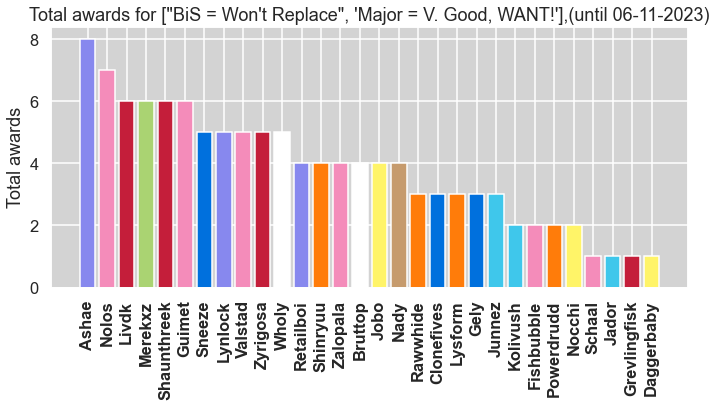

In [84]:
import seaborn as sns

lookup_table = {
    'DEATHKNIGHT': '#C41E3A',
    'DEMON HUNTER': '#A330C9',
    'DRUID': '#FF7C0A',
    'EVOKER': '#33937F',
    'HUNTER': '#AAD372',
    'MAGE': '#3FC7EB',
    'MONK': '#00FF98',
    'PALADIN': '#F48CBA',
    'PRIEST': '#FFFFFF',
    'ROGUE': '#FFF468',
    'SHAMAN': '#0070DD',
    'WARLOCK': '#8788EE',
    'WARRIOR': '#C69B6D',
    'NaN': '#ffffff'
}

# Calculate the value counts of unique players
player_counts = df['player'].value_counts()

# Create a bar plot with colors based on the lookup_table
plt.figure(figsize=(10, 6))
sns.set_context("talk")
plt.bar(player_counts.index, player_counts.values, color=[lookup_table.get(df.loc[df['player'] == player, 'class'].values[0], 'gray') for player in player_counts.index])
# Set plot labels and title
plt.xlabel('')
plt.ylabel('Total awards')
plt.title(f'Total awards for {Filter_type},(until {date})')

# Rotate x-axis labels for better visibility (if needed)
plt.xticks(rotation=90)
plt.gca().set_facecolor('lightgray')
plt.xticks(fontweight='bold')
plt.tight_layout()
plt.savefig('total award.png')
plt.show()


In [85]:
import plotly.graph_objects as go
import plotly.offline as offline
import random

# Pivot the data to create a table with counts of player names for each date
table = pd.pivot_table(df, index='date', columns='player', aggfunc='size', fill_value=0)

# Sort the table by date in ascending order
table = table.sort_index()

# Compute the cumulative sum along the rows (axis=0) of the table
table_cumulative = table.cumsum(axis=0)

# Create an empty list to store the data traces
data = []
# Plot the cumulative counts over time with colors based on the lookup table
for player_name in table_cumulative.columns:
    player_class = df[df['player'] == player_name]['class'].iloc[0]
    color = lookup_table.get(player_class, 'gray')
    
    line_values = table_cumulative[player_name]
    
    # Randomly select dash type and thickness
    dash_types = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
    dash_type = random.choice(dash_types)
    thickness = random.uniform(4, 8)
    
    # Create a Scatter trace for each player
    trace = go.Scatter(
        x=table_cumulative.index,
        y=line_values,
        mode='lines+markers',
        name=player_name,
        line=dict(color=color, dash=dash_type, width=thickness,shape='hv'),
        marker=dict(
            size=[16 if i == 0 or line_values[i] != line_values[i-1] else 0 for i in range(len(line_values))],
            symbol=['circle' if i == 0 or line_values[i] != line_values[i-1] else 'circle-open' for i in range(len(line_values))],
            color=color,
        ),
        showlegend=True,
        visible='legendonly',
        hovertemplate='Player: ' + player_name + '<br>Date: %{x}<br>Items: %{text}',
        text=[', '.join(df[(df['player'] == player_name) & (df['date'] == d)]['item'].tolist())
              for d in table_cumulative.index]
    )
    
    # Append the trace to the data list
    data.append(trace)

# Create the layout for the plot
layout = go.Layout(
    title=f'Cumulative Count awards for {Filter_type}, (until {date}) ',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative Count'),
    legend=dict(orientation='v', x=0, y=1, xanchor='left', yanchor='top', bgcolor='lightgray'),
)

# Create the figure with data and layout
fig = go.Figure(data=data, layout=layout,)

# Display the interactive plot
fig.show()
offline.plot(fig, filename=f'Cumulative Count of Players awarded Full BiS Over Time {date}.html', auto_open=False)


'Cumulative Count of Players awarded Full BiS Over Time 06-11-2023.html'

In [86]:
matching_items = df.loc[(df['date'] == '2023-01-22') & (df['player'] == 'Jador'), 'item']
print(matching_items)

Series([], Name: item, dtype: object)


In [87]:
unique_items = df['player'].unique()
print(len(unique_items))

30


In [88]:
df

,player,date,time,id,item,itemID,itemString,response,votes,class,...,mapID,groupSize,gear1,gear2,responseID,isAwardReason,subType,equipLoc,note,owner
240,Sneeze,2023-10-15,21:20:41,1697401241-7,[Althor's Abacus],50366,item:50366::::::::80,BiS = Won't Replace,1,SHAMAN,...,631,25,|cffa335ee|Hitem:45535::::::::80:::::::::|h[Sh...,|cffa335ee|Hitem:47059::::::::80:::::::::|h[So...,1,False,Miscellaneous,Trinket,NaN,Lynlock-Earthshaker
241,Sneeze,2023-10-16,21:14:10,1697487250-5,[Protector's Mark of Sanctification],52026,item:52026::::::::80,BiS = Won't Replace,0,SHAMAN,...,631,25,NaN,NaN,1,False,Junk,NaN,NaN,Lynlock-Earthshaker
244,Sneeze,2023-10-29,22:14:16,1698617656-32,[Frostbinder's Shredded Cape],50628,item:50628::::::::80,BiS = Won't Replace,2,SHAMAN,...,631,25,|cffa335ee|Hitem:48671:3831:40155::::::80:::::...,NaN,1,False,Cloth,Back,NaN,Lynlock-Earthshaker
245,Sneeze,2023-10-30,19:38:11,1698694691-6,[Bloodsunder's Bracers],50687,item:50687::::::::80,BiS = Won't Replace,1,SHAMAN,...,631,25,|cffa335ee|Hitem:45460:2332:40128::::::80:::::...,NaN,1,False,Mail,Wrist,NaN,Lynlock-Earthshaker
246,Sneeze,2023-10-30,20:54:55,1698699295-0,[Protector's Mark of Sanctification],52026,item:52026::::::::80,BiS = Won't Replace,2,SHAMAN,...,631,25,NaN,NaN,1,False,Junk,NaN,NaN,Lynlock-Earthshaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,Shaunthreek,2023-10-29,20:43:34,1698612214-13,[Skeleton Lord's Circle],50657,item:50657::::::::80,BiS = Won't Replace,2,DEATHKNIGHT,...,631,25,|cffa335ee|Hitem:50453::40146::::::80:::::::::...,|cffa335ee|Hitem:52570::::::::80:::::::::|h[As...,1,False,Miscellaneous,Finger,got a ring upgrade fairly recently so dont min...,Lynlock-Earthshaker
3755,Shaunthreek,2023-10-30,19:37:52,1698694672-5,[Winding Sheet],50677,item:50677::::::::80,BiS = Won't Replace,1,DEATHKNIGHT,...,631,25,|cffa335ee|Hitem:45588:3831:40111::::::80:::::...,NaN,1,False,Cloth,Back,"phase bis with haste on it, not arm pen, just ...",Lynlock-Earthshaker
3756,Shaunthreek,2023-11-06,20:06:01,1699301161-5,[Raging Behemoth's Shoulderplates],50674,item:50674::::::::80,BiS = Won't Replace,0,DEATHKNIGHT,...,631,25,|cffa335ee|Hitem:48486:3808:42142::::::80:::::...,NaN,1,False,Plate,Shoulder,NaN,Lynlock-Earthshaker
3803,Powerdrudd,2023-10-29,22:09:33,1698617373-30,[Vanquisher's Mark of Sanctification],52025,item:52025::::::::80,BiS = Won't Replace,0,DRUID,...,631,25,NaN,NaN,1,False,Junk,NaN,NaN,Lynlock-Earthshaker


In [89]:
#attandance 
path=r"C:\Users\koliv\Downloads\Habits Attendance  Warcraft Logs.csv"
dfAttendance=pd.read_csv(path)
dfAttendance = dfAttendance.loc[:,dfAttendance.columns.str.find('.') < 0]
dfAttendance

dfAttendance = dfAttendance[["Name"] + [col for col in dfAttendance.columns if col.startswith("Ice")]]
dfAttendance.columns = dfAttendance.columns.str.replace("Ice", "")
def convert_column_to_date(column_name):
    if column_name == "Name":
        return column_name
    parts = column_name.split("/")
    day = parts[0]
    month = parts[1]
    year = 2023  # You can change the year as needed
    return pd.to_datetime(f"{day}/{month}/{year}", format='%d/%m/%Y')
dfAttendance = dfAttendance.rename(columns={'Name': 'player'})
dfAttendance.columns = [convert_column_to_date(col) if col.replace('/', '').isdigit() else col for col in dfAttendance.columns]
player_class_mapping = dffull.set_index('player')['class'].to_dict()
dfAttendance['class'] = dfAttendance['player'].map(player_class_mapping)
dfAttendance

,player,2023-11-06 00:00:00,2023-11-05 00:00:00,2023-11-04 00:00:00,2023-11-01 00:00:00,2023-10-30 00:00:00,2023-10-29 00:00:00,2023-10-28 00:00:00,2023-10-25 00:00:00,2023-10-23 00:00:00,2023-10-22 00:00:00,2023-10-21 00:00:00,class
0,Ashae,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,WARLOCK
1,Bruttop,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,PRIEST
2,Clonefives,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,SHAMAN
3,Cloney,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,SHAMAN
4,Daggerbaby,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,ROGUE
5,Damages,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Draxis,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,WARLOCK
7,Fishbear,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fishbubble,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,PALADIN
9,Gely,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,SHAMAN


C:\Users\koliv\AppData\Local\Temp\ipykernel_29148\1861159539.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



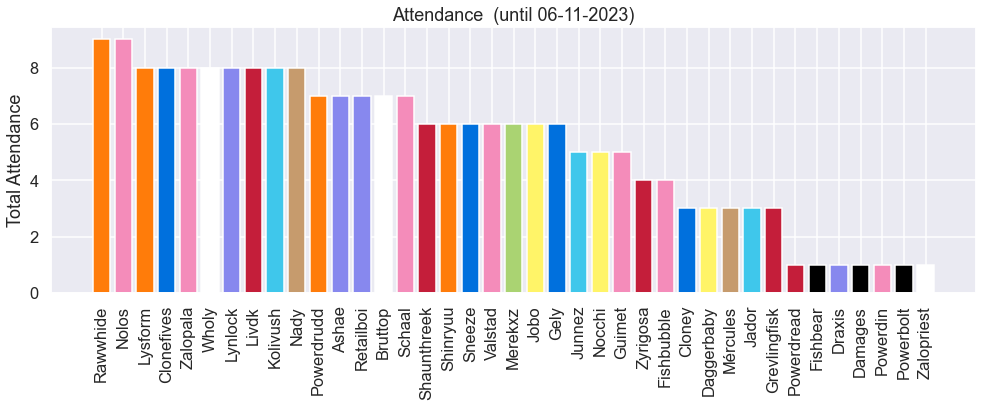

In [90]:
# Calculate the sum for each name
dfAttendance["Total"] = dfAttendance.iloc[:, 1:].sum(axis=1)
dfAttendance = dfAttendance.sort_values(by="Total", ascending=False)
sns.set_style("darkgrid")
# Plot the results
colors = [lookup_table.get(player, '#000000') for player in dfAttendance['class']]  # Get colors from the lookup table
plt.figure(figsize=(14, 6))
plt.bar(dfAttendance["player"], dfAttendance["Total"],color=colors)
plt.xlabel("")
plt.ylabel("Total Attendance")
plt.title(f"Attendance  (until {date})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Attendance.png')
plt.show()

In [91]:
df_player_counts = player_counts.reset_index()
df_player_counts.columns = ['player', 'Award']

# Merge the "df_player_counts" DataFrame with the "dfAttendance" DataFrame on the 'Player' column
combined_df = df_player_counts.merge(dfAttendance, on='player')
combined_df['Ratio'] = combined_df['Award'] / combined_df['Total']

combined_df

,player,Award,2023-11-06 00:00:00,2023-11-05 00:00:00,2023-11-04 00:00:00,2023-11-01 00:00:00,2023-10-30 00:00:00,2023-10-29 00:00:00,2023-10-28 00:00:00,2023-10-25 00:00:00,2023-10-23 00:00:00,2023-10-22 00:00:00,2023-10-21 00:00:00,class,Total,Ratio
0,Ashae,8,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,WARLOCK,7.0,1.142857
1,Nolos,7,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,PALADIN,9.0,0.777778
2,Livdk,6,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,DEATHKNIGHT,8.0,0.750000
3,Merekxz,6,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,HUNTER,6.0,1.000000
4,Shaunthreek,6,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,DEATHKNIGHT,6.0,1.000000
5,Guimet,6,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,PALADIN,5.0,1.200000
6,Sneeze,5,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,SHAMAN,6.0,0.833333
7,Lynlock,5,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,WARLOCK,8.0,0.625000
8,Valstad,5,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,PALADIN,6.0,0.833333
9,Zyrigosa,5,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,DEATHKNIGHT,4.0,1.250000


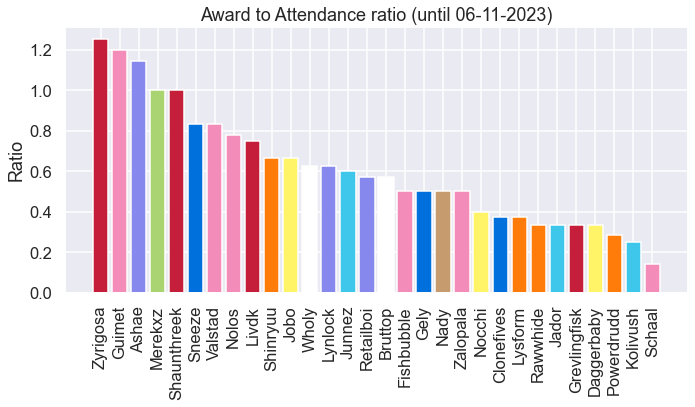

In [92]:
# Calculate the sum for each name
combined_df = combined_df.sort_values(by="Ratio", ascending=False)
sns.set_style("darkgrid")
# Plot the results
colors = [lookup_table.get(player, '#000000') for player in combined_df['class']]  # Get colors from the lookup table
plt.figure(figsize=(10, 6))
plt.bar(combined_df["player"], combined_df["Ratio"],color=colors)
plt.xlabel("")
plt.ylabel("Ratio")
plt.title(f"Award to Attendance ratio (until {date})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('attendance ratio.png')
plt.show()

In [93]:
from PIL import Image

# Open the individual character images
image1 = Image.open("attendance ratio.png")
image2 = Image.open("Attendance.png")
image3 = Image.open("total award.png")

# Determine the size of the big image
max_width = max(image1.width, image2.width, image3.width)
total_height = image1.height + image2.height + image3.height

# Create a new image with a white background
big_image = Image.new("RGB", (max_width, total_height), (255, 255, 255))

# Paste each character onto the big image
big_image.paste(image1, (0, 0))
big_image.paste(image2, (0, image1.height))
big_image.paste(image3, (0, image1.height + image2.height))

# Save the merged image
big_image.save(f"merged_image_report {date}.png")